## VISUALIZAÇÃO TEMPORAL DE VAZÃO

O objetivo desse notebook é visualizar:
* Anos com dados nulos
* O comportamento da tag ao longo do tempo

Requisitos para rodar esse notebook:
* É necessário rodar '1_preprocessamento'/'0.1_analise_tags_recebidas'

In [1]:
import json
import pandas as pd
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import time

%run ..\..\..\funcoes_base_global\funcoes_plot.py

#### Leitura do Arquivo JSON contendo todas as Tag's e suas descrições

In [2]:
dir_tags = '..\\..\\..\\funcoes_base_global\\tags_description.json' 

with open(dir_tags) as f:
    tags_names = json.loads(f.read())

#### Exemplo de Utilização

In [3]:
comp = '302A'
tipo = 'Vazao'
tags_names[comp][tipo]

{'FI2601V.PV': 'VAZAO MASSICA',
 'FI3402.PV': 'VAZAO FLUSH',
 'FIC2601.PV': 'VAZAO COMPRESSOR'}

In [4]:
def path(name):
    path = os.path.join('..','1_preprocessamento','out',name)
    return(path)

def path_out(name):
    path = os.path.join('out',name)
    return(path)

In [5]:
df = pd.read_csv(path('df_vazao.csv.gz'), compression = 'gzip', parse_dates = ['Date'], index_col = 'Date')

In [6]:
colunas = [x for x in list(tags_names[comp][tipo].keys()) if x in df.columns]

columns_drop = df.columns[df.columns.str.contains('_quality')]
data = df[colunas]

### 1. Anos faltantes

In [6]:
# criando um dataframe novo cujo index são os anos
df_year = data.copy()
df_year.index = df_year.index.year

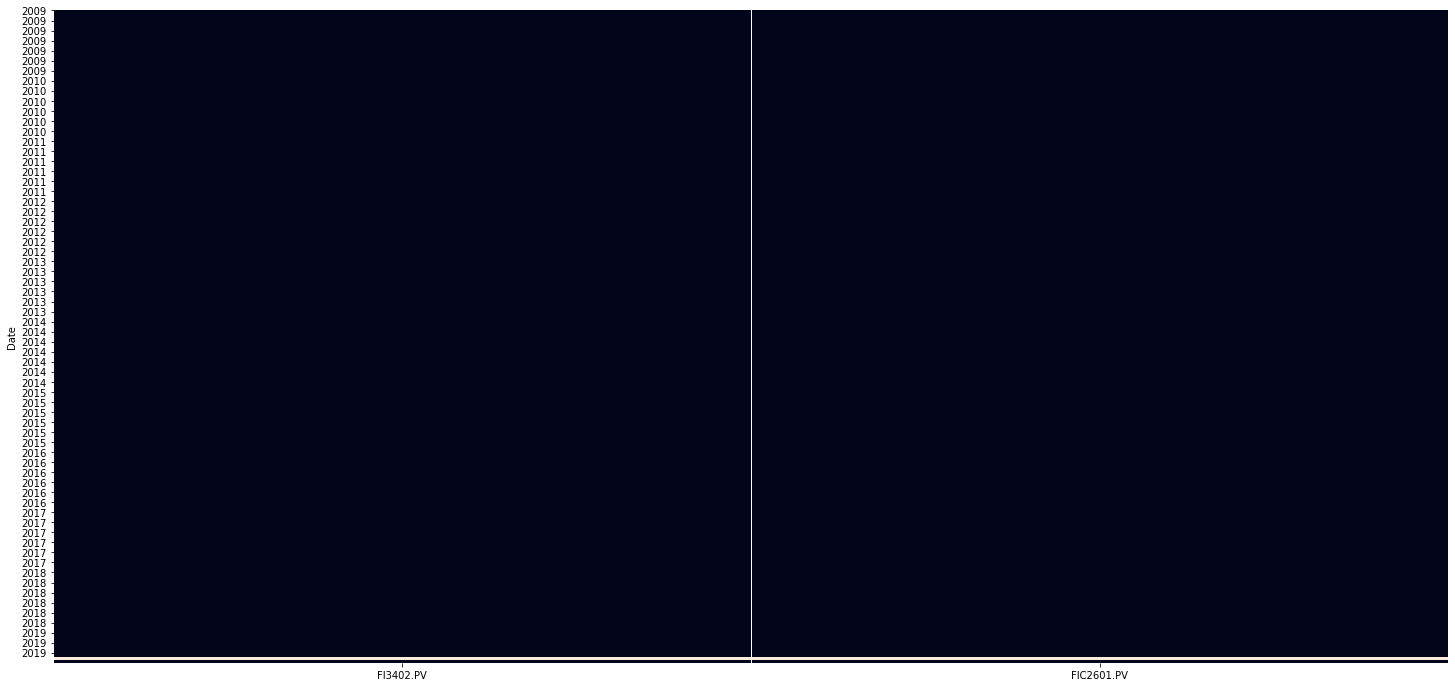

In [7]:
plt.figure(figsize = [25,12])
sns.heatmap(df_year.isnull(), cbar = False)

### 2. A partir de 2009

(5517491, 1)


C:\Users\jessica.assumpcao\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\jessica.assumpcao\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


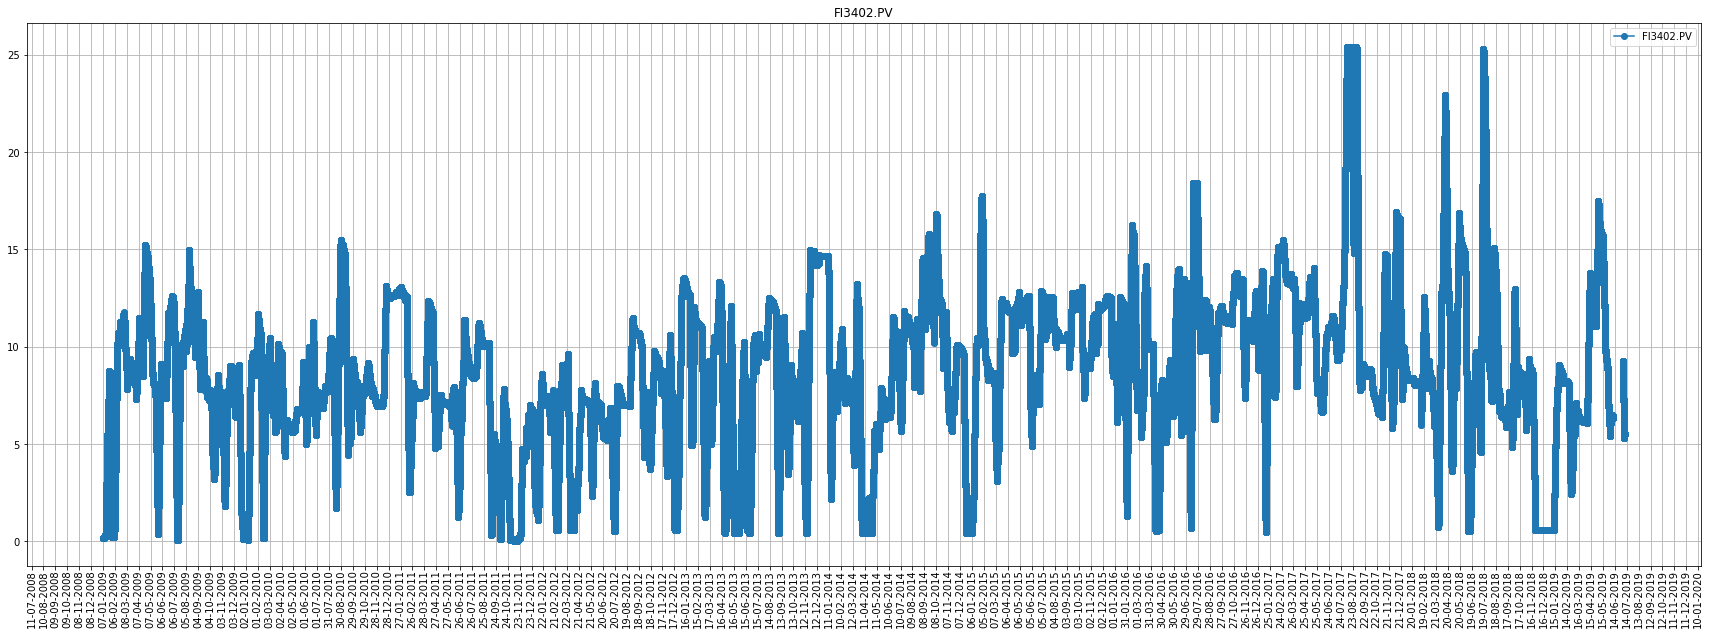

(5517491, 1)


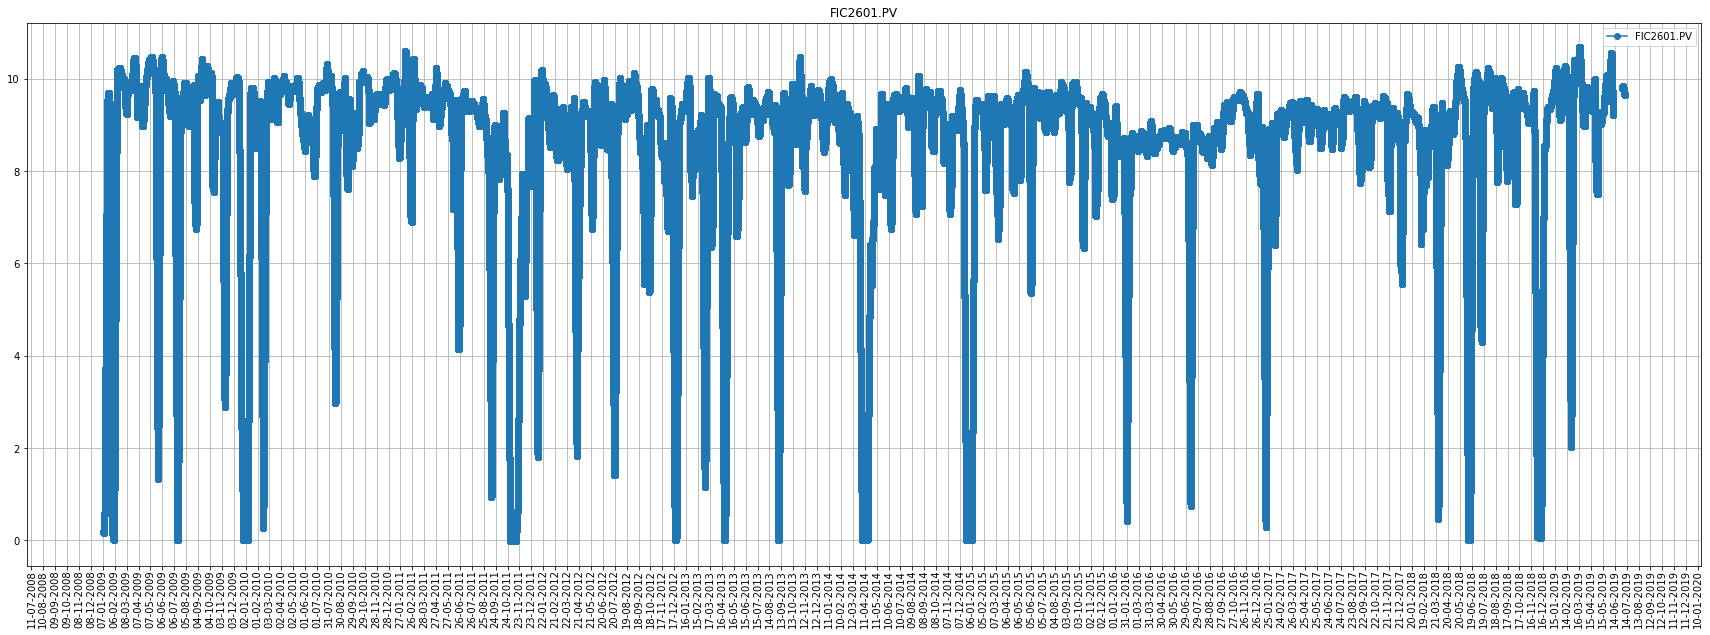

In [8]:
start_date ='2009-01-01 00:00:00'
end_date = '2019-10-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]
for tag in colunas:
    plot_variables_rolling_V2(data,[tag],legend=[tag],reference_line=[],
                           rolling_time=roling,
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);

### 3. A partir de 2015

(2371445, 1)


C:\Users\jessica.assumpcao\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\jessica.assumpcao\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


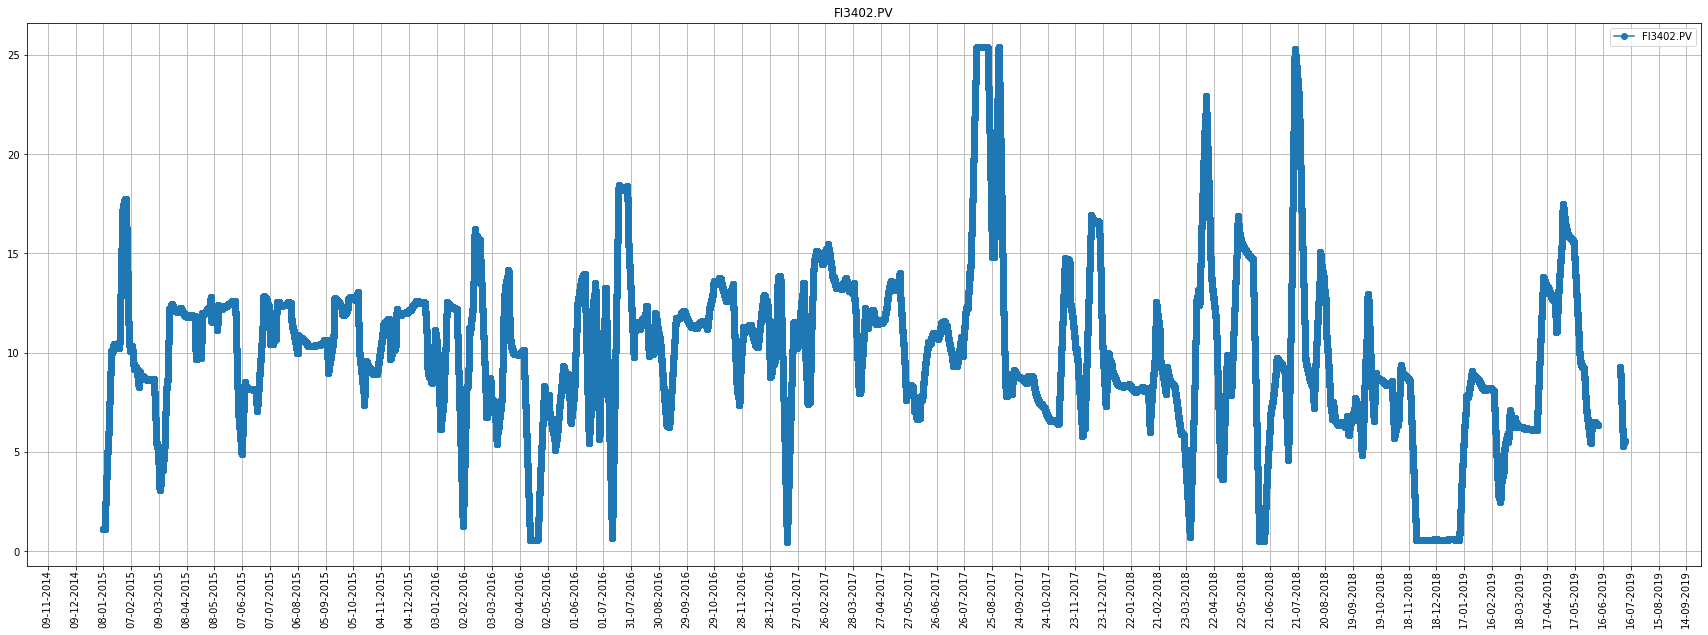

(2371445, 1)


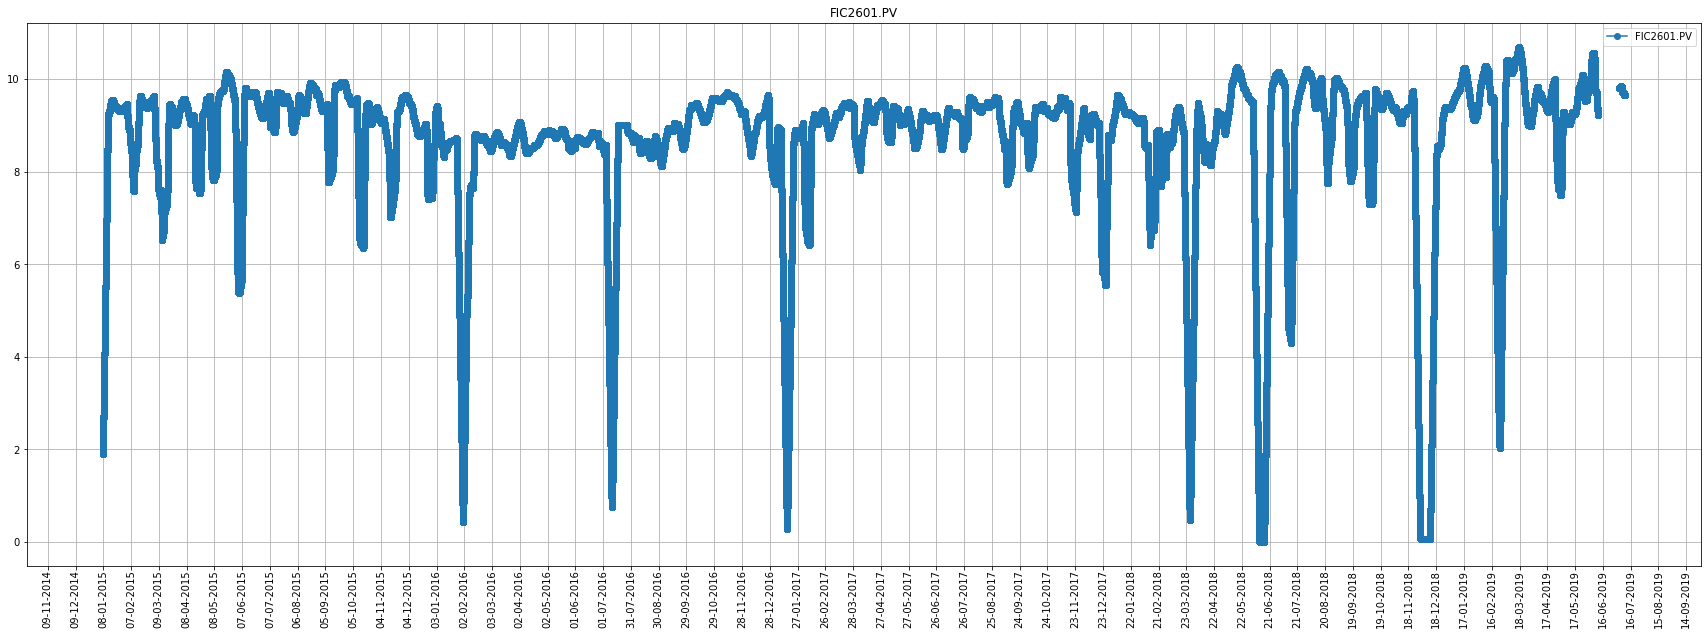

In [7]:
start_date ='2015-01-01 00:00:00'
end_date = '2019-10-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]
for tag in colunas:
    plot_variables_rolling_V2(data,[tag],legend=[tag],reference_line=[],
                           rolling_time=roling,
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);

In [8]:
data.sort_index(inplace = True)
data_2015 = data.loc[start_date:]   # pegando os dados a partir de 2015

In [9]:
descricao_tag = tags_names[comp][tipo]
data_2015.rename(columns = descricao_tag, inplace = True)
data_2015.columns

C:\Users\jessica.assumpcao\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['VAZAO FLUSH', 'VAZAO COMPRESSOR'], dtype='object')

In [10]:
data_2015.describe()

,VAZAO FLUSH,VAZAO COMPRESSOR
count,2.348043e+06,2.348043e+06
mean,9.964996e+00,8.654818e+00
std,5.104804e+00,2.380305e+00
min,0.000000e+00,0.000000e+00
25%,7.650000e+00,8.416000e+00
50%,1.029900e+01,9.084000e+00
75%,1.262600e+01,9.851000e+00
max,2.537200e+01,1.420800e+01


### Analisando as vazões num período de queda da vazão no compressor

(161280, 1)


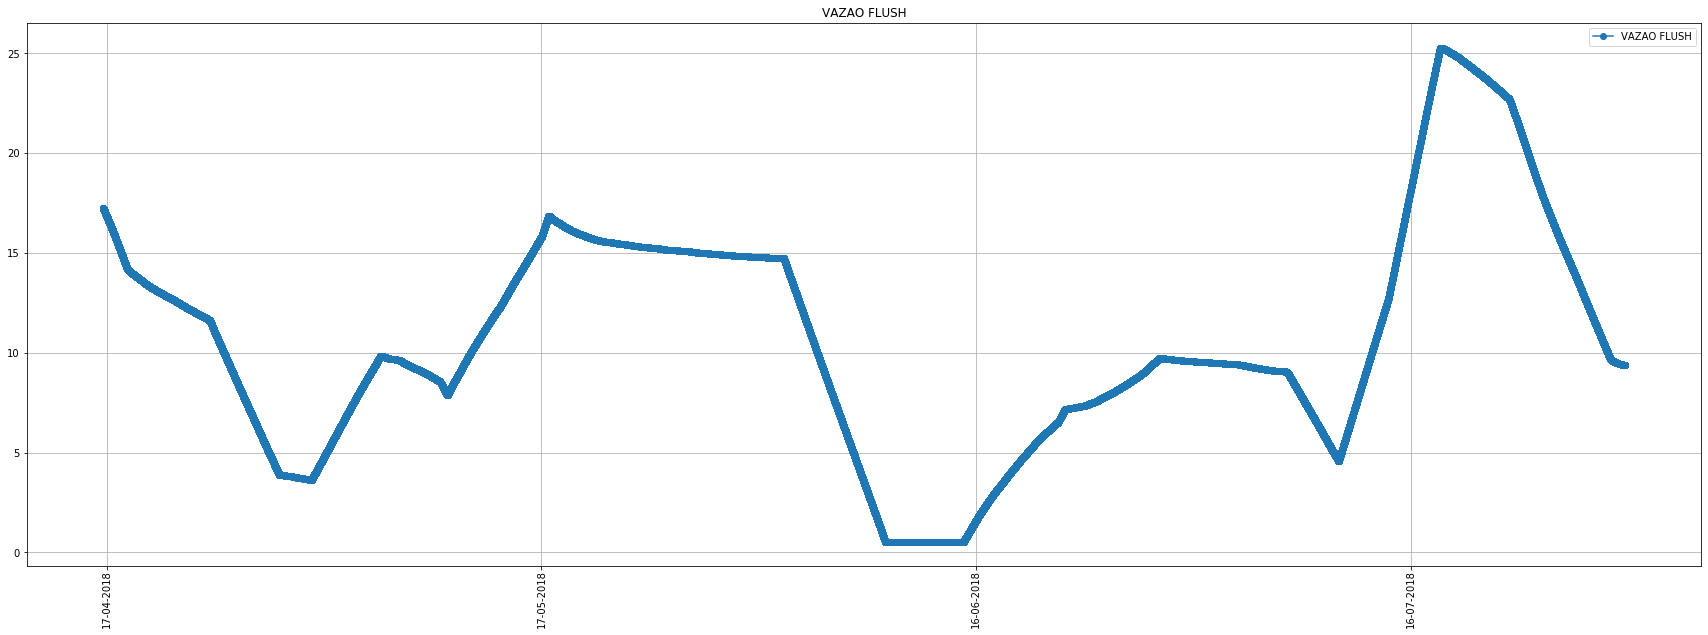

(161280, 1)


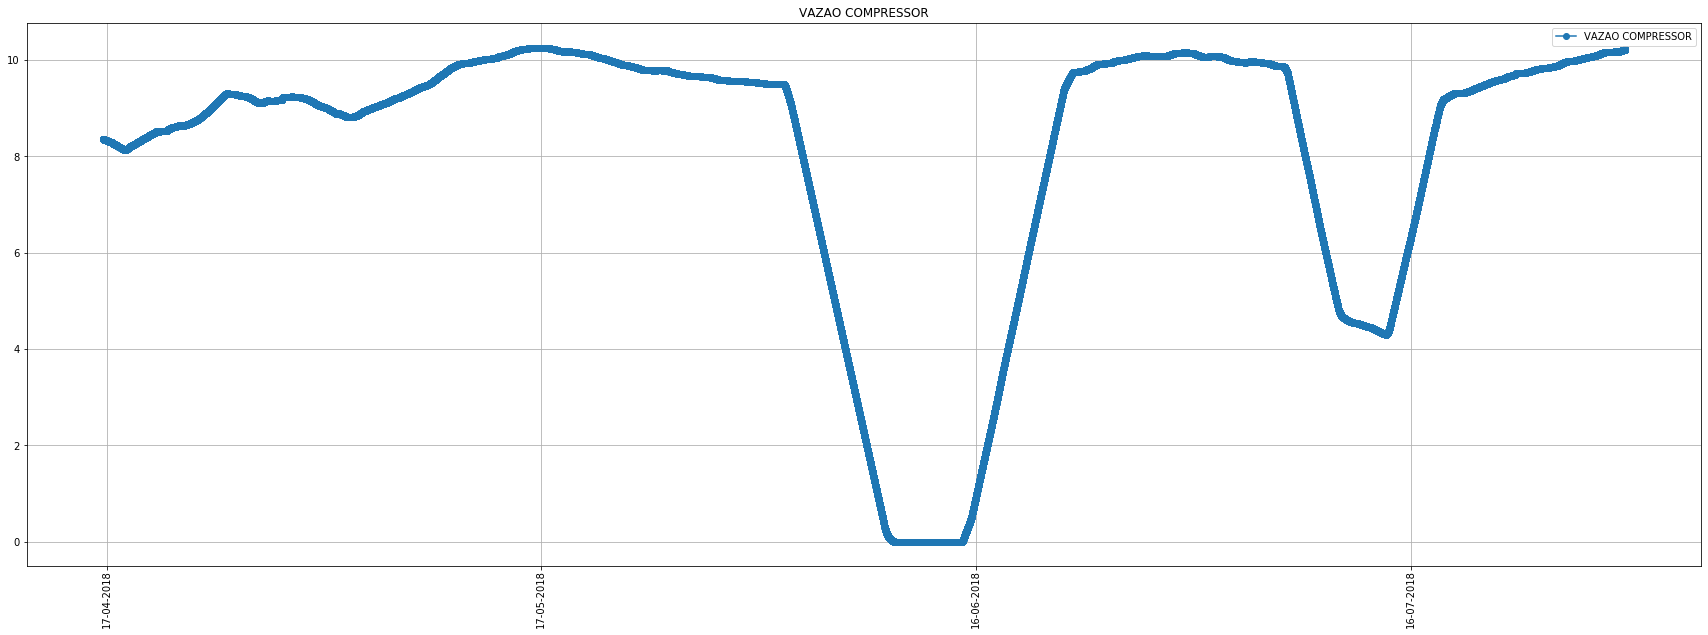

In [11]:
start_date ='2018-04-10 00:00:00'
end_date = '2018-07-30 23:59:00'
days_interval = 30
minutes_interval = 60*12
roling = [7*60*24]
for tag in data_2015.columns:
    plot_variables_rolling_V2(data_2015,[tag],legend=[tag],reference_line=[],
                           rolling_time=roling,
                           minutes_interval=minutes_interval,start_date=start_date,end_date=end_date,days_interval=days_interval);

Considerações finais:
* O valor mínimo da vazão é 0, ou seja, deve-se tomar cuidado ao calcular a potência específica.